## IRRIGAÇÃO LOCALIZADA POR MICROASPERSÃO

### Dados do projeto:

In [1485]:
altitude_m = 1161
kc = 0.95
espacamento_entre_linhas_m = 3
espacamento_entre_plantas_m = 2.5
jornada_de_trabalho_h_por_dia = 16
largura_m = 400
comprimento_m = 300
distancia_da_captacao_m = 132

quantidade_de_linhas_laterais_porfileira = 1
regiao = 1 # [1] para regiões úmidas e [2] para regiões secas.

declive_na_largura = 0.03
declive_no_comprimento = 0.03

### 1º Passo: escolha do microaspersor

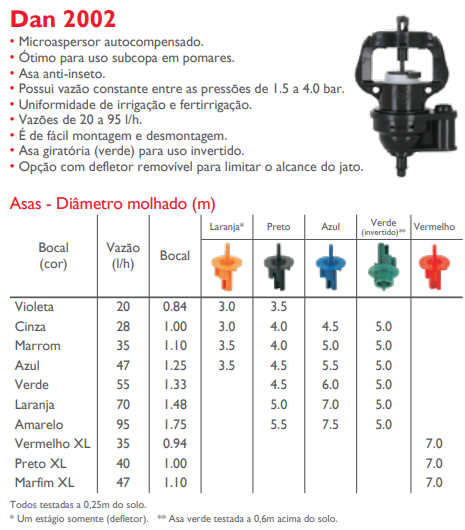

In [1634]:
pressao_de_servico_mca = 15
vazao_do_microaspersor_L_por_h = 20
raio_molhado_m = 3

print(f"O microaspersor escolhido foi o: Dan 2002, com bocal Violeta acoplado com defletor laranja, \ncom as características de: \n- Pressão de serviço = {pressao_de_servico_mca} mca,\n- Vazão = {vazao_do_microaspersor_L_por_h} L/h, e\n- Raio molhado = {raio_molhado_m}m.")

O microaspersor escolhido foi o: Dan 2002, com bocal Violeta acoplado com defletor laranja, 
com as características de: 
- Pressão de serviço = 15 mca,
- Vazão = 20 L/h, e
- Raio molhado = 3m.


### 2º Passo: porcentagem de área molhada

#### 2.1. Espaçamento entre emissores

In [1487]:
selinha = 0.8*raio_molhado_m
print(f"Se'= 0,8 * D \n   = 0.8 * {raio_molhado_m:.2f} \n   = {selinha:.2f} m")

Se'= 0,8 * D 
   = 0.8 * 3.00 
   = 2.40 m


2.2. Número de emissores por planta (NEP)

In [1488]:
import math

nEP = espacamento_entre_plantas_m/selinha

if nEP.is_integer() == True:

    print(f"NEP = SP / Se' \n    = {espacamento_entre_plantas_m:.2f} / {selinha:.2f} \n    = {nEP:.2f}.")
elif nEP < 1:
    print(f"NEP = SP / Se' \n    = {espacamento_entre_plantas_m:.2f} / {selinha:.2f} \n    = {nEP:.2f} -> arredondando para cima: {math.ceil(nEP):.2f}.")
    nEP = math.ceil(nEP)
else:
    print(f"NEP = SP / Se' \n    = {espacamento_entre_plantas_m:.2f} / {selinha:.2f} \n    = {nEP:.2f} -> arredondando para baixo: {math.floor(nEP):.2f}")
    nEP = math.floor(nEP)


NEP = SP / Se' 
    = 2.50 / 2.40 
    = 1.04 -> arredondando para baixo: 1.00


#### 2.3.  Espaçamento entre emissores (Se)

In [1489]:
se = espacamento_entre_plantas_m/nEP

print(f"Se = SP / NEP \n   = {espacamento_entre_plantas_m:.2f} / {nEP:.2f} \n   = {se:.2f} m")

Se = SP / NEP 
   = 2.50 / 1.00 
   = 2.50 m


#### 2.4. Porcentagem de área molhada (Pm):

In [1490]:

if quantidade_de_linhas_laterais_porfileira == 1:
    if se < selinha:
        pm = nEP * ((se*raio_molhado_m)/(espacamento_entre_plantas_m*espacamento_entre_linhas_m))*100
        print(f"Pm = NEP * [(Se * D) / (SP * SL)] * 100 \n   = {nEP:.2f} * [({se:.2f} * {raio_molhado_m:.2f}) / ({espacamento_entre_plantas_m:.2f} * {espacamento_entre_linhas_m:.2f})] * 100 \n   = {pm:.2f}%")
    else:
        pm = nEP * ((selinha*raio_molhado_m)/(espacamento_entre_plantas_m*espacamento_entre_linhas_m))*100
        print(f"Pm = NEP * [(Se' * D) / (SP * SL)] * 100 \n   = {nEP:.2f} * [({selinha:.2f} * {raio_molhado_m:.2f}) / ({espacamento_entre_plantas_m:.2f} * {espacamento_entre_linhas_m:.2f})] * 100 \n   = {pm:.2f}%")
elif quantidade_de_linhas_laterais_porfileira == 2:
    if se < selinha:
        pm = (nEP/2) * ((se*(selinha+raio_molhado_m))/(espacamento_entre_plantas_m*espacamento_entre_linhas_m))*100
        print(f"Pm = (NEP/2) * [Se * (Se' + D) / (SP * SL)] * 100 \n   = ({nEP:.2f}/2) * [{se:.2f} * ({selinha:.2f} * {raio_molhado_m:.2f}) / ({espacamento_entre_plantas_m:.2f} * {espacamento_entre_linhas_m:.2f})] * 100 \n   = {pm:.2f}%")
    else:
        pm = (nEP/2) * ((selinha*(selinha+raio_molhado_m))/(espacamento_entre_plantas_m*espacamento_entre_linhas_m))*100
        print(f"Pm = (NEP/2) * [Se' * (Se' + D) / (SP * SL)] * 100 \n   = ({nEP:.2f}/2) * [{selinha:.2f} * ({selinha:.2f} + {raio_molhado_m:.2f}) / ({espacamento_entre_plantas_m:.2f} * {espacamento_entre_linhas_m:.2f})] * 100 \n   = {pm:.2f}%")
else:
    print("O valor de quantidade de linhas laterias esta incorreto.") 

Pm = NEP * [(Se' * D) / (SP * SL)] * 100 
   = 1.00 * [(2.40 * 3.00) / (2.50 * 3.00)] * 100 
   = 96.00%


#### 2.5. Comparar o Pm com o critério:

In [1491]:
if regiao == 1 and pm > 20:
    print("Critério satisfeito.")
elif regiao == 1 and pm < 20:
    print("colocar trecho para arredondar para cima.")
elif regiao == 2 and pm > 33:
    print("Critério satisfeito.")
elif regiao == 2 and pm < 33:
    print("colocar trecho para arredondar para cima.")
else:
    print("O valor da região esta incorreto.") 
    

Critério satisfeito.


### 3º Passo: volume de água por planta

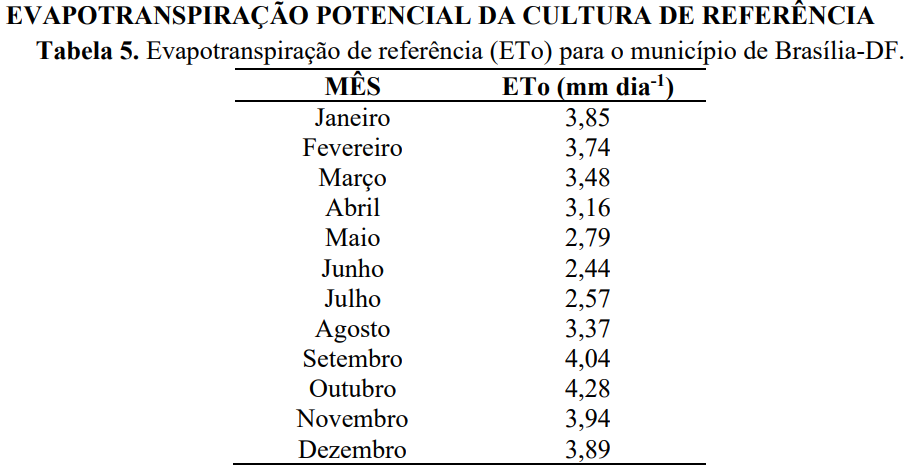

In [1492]:
eT0 = 4.28;

#### 3.1. kloc: coeficiente de irrigação localizada

In [1493]:
if pm >= 65:
    kloc = 1
    print("Pm é maior ou igual a 65%, portanto o kloc é igual 1.")
else:
    kloc = (1.09 * (pm/100)) + 0.3
    print(f"kloc = (1.09 * (pm / 100)) + 0.3 \n     = (1.09 *  ({pm:.2f} / 100)) + 0.3 \n     = {kloc:.2f}")

Pm é maior ou igual a 65%, portanto o kloc é igual 1.


#### 3.2. volume líquido (VL)

In [1494]:
vL = eT0 * kc * (espacamento_entre_linhas_m*espacamento_entre_plantas_m) * kloc

print(f"VL = eT0 * kc * Ap * kloc \n   = {eT0:.2f} * {kc:.2f} * ({espacamento_entre_linhas_m:.2f} * {espacamento_entre_plantas_m:.2f}) * {kloc:.2f}) \n   = {vL:.2f} L/planta/dia")

VL = eT0 * kc * Ap * kloc 
   = 4.28 * 0.95 * (3.00 * 2.50) * 1.00) 
   = 30.49 L/planta/dia


#### 3.3. volume bruto (VB)

In [1495]:
eficiencia_de_aplicacao = 0.9

vB = vL/eficiencia_de_aplicacao

print(f"VB = VL / EA \n   = {vL:.2f} / {eficiencia_de_aplicacao:.2f} \n   = {vB:.2f} L/planta/dia")

VB = VL / EA 
   = 30.49 / 0.90 
   = 33.88 L/planta/dia


### 4º Passo: Tempo de irrigação (Ti) 

In [1496]:
ti = vB/(nEP*vazao_do_microaspersor_L_por_h)

print(f"Ti = VB / (NEP * Qp) \n    = {vB:.2f}/({nEP:.2f} * {vazao_do_microaspersor_L_por_h:.2f})  \n    = {ti:.2f} h")

Ti = VB / (NEP * Qp) 
    = 33.88/(1.00 * 20.00)  
    = 1.69 h


### 5º Passo: Número de setores (Ns)


In [1497]:
ns = jornada_de_trabalho_h_por_dia/ti
ns_par_abaixo = math.floor(round(((ns-2)), 0) / 2) * 2

print(f"Ns = J / Ti \n   = {jornada_de_trabalho_h_por_dia:.2f} / {ti:.2f} \n   = {ns:.2f} setores \n   = Já que na prática não é aconselhavél trabalhar com a setorização máxima,\n     para considerar imprevistos no sistema, por tanto o número de setores \n     deve ser de: {ns_par_abaixo:.2f} setores, com uma folga de {ns-ns_par_abaixo:.2f} horas.")

Ns = J / Ti 
   = 16.00 / 1.69 
   = 9.44 setores 
   = Já que na prática não é aconselhavél trabalhar com a setorização máxima,
     para considerar imprevistos no sistema, por tanto o número de setores 
     deve ser de: 6.00 setores, com uma folga de 3.44 horas.


### 6º Passo: Layout da área

##### 6.1. Declividade da linha lateral

In [1635]:
if declive_no_comprimento < declive_na_largura:
    declividade_paralela_a_linha_lateral = declive_no_comprimento
    declividade_nao_paralela_a_linha_lateral = declive_na_largura
    print(f"A declividade paralela a linha lateral é do comprimento com {declive_no_comprimento*100}%")
elif declive_no_comprimento == declive_na_largura:
    declividade_paralela_a_linha_lateral = declive_no_comprimento
    declividade_nao_paralela_a_linha_lateral = declive_na_largura
    print(f"A declividade paralela a linha laterla pode ser tanto a da largura quanto a do comprimento\n = {declive_no_comprimento*100}%")
else:
    declividade_paralela_a_linha_lateral = declive_na_largura
    declividade_nao_paralela_a_linha_lateral = declive_no_comprimento
    print(f"A declividade paralela a linha lateral é do comprimento com {declive_na_largura*100}%")

A declividade paralela a linha laterla pode ser tanto a da largura quanto a do comprimento
 = 3.0%


##### 6.2. Número de emissores:

In [1570]:
lLL = comprimento_m/ns_par_abaixo

ne = math.ceil(lLL/se)

print(f"Ne = comprimento do setor / distancia entre plantas \n   = {lLL:.0f} / {se}  \n   = {ne} aspersor(es) por linha lateral")

Ne = comprimento do setor / distancia entre plantas 
   = 50 / 2.5  
   = 20 aspersor(es) por linha lateral


#### 6.3. Vazão da linha lateral:

In [1575]:
qLL = (ne * vazao_do_microaspersor_L_por_h)/1000/3600

print(f"Qll = Ne * vazão do microaspersor (m³/s) \n    = ({ne} * {vazao_do_microaspersor_L_por_h/1000/3600:.2e} \n    = {qLL:.2e} m³/s")

Qll = Ne * vazão do microaspersor (m³/s) 
    = (20 * 5.56e-06 
    = 1.11e-04 m³/s


#### 6.4. Número de linhas laterais:

In [1587]:
nLL_antes =  (((largura_m/2)/espacamento_entre_linhas_m)*2) # Levando em conta o Layout padrão.

nLL = math.ceil(nLL_antes)

print(f"Nll = (largura de 1 setor / espaçamento entre linhas) * 2 \n    = ({largura_m/2:.0f} / {espacamento_entre_linhas_m}) * 2  \n    = {nLL_antes:.2f} -> arredondando para cima: {nLL:.0f} linhas laterias")

Nll = (largura de 1 setor / espaçamento entre linhas) * 2 
    = (200 / 3) * 2  
    = 133.33 -> arredondando para cima: 134 linhas laterias


#### 6.5. Vazão da linha de derivação:

In [1590]:
qLD = nLL*qLL

print(f" Qld = Nll * Qll \n     = {nLL} * {qLL:.2e} \n     = {qLD:.2e} m³/s")

 Qld = Nll * Qll 
     = 134 * 1.11e-04 
     = 1.49e-02 m³/s


#### 6.6. Comprimento da linha de derivação:

In [1592]:
lLD = largura_m/2

print(f"{lLD:.0f} m")

200 m


#### 6.7. Comprimento da linha principal:

In [1593]:
lLP = comprimento_m - (comprimento_m/ns_par_abaixo)

print(f"{lLP:.0f} m")

250 m


#### 6.8. Vazão da linha principal:

In [1505]:
qLP = qLD

print(f"{qLP:.2e} m³/s")

1.49e-02 m³/s


#### 6.9. Comprimento da adutora:

In [1594]:
lAD = distancia_da_captacao_m

print(f"{lAD:.0f} m")

132 m


#### 6.10. Vazão da adutora:

In [1507]:
qAD = qLP

print(f"{qLD:.2e} m³/s")

1.49e-02 m³/s


#### 6.11. Layout:

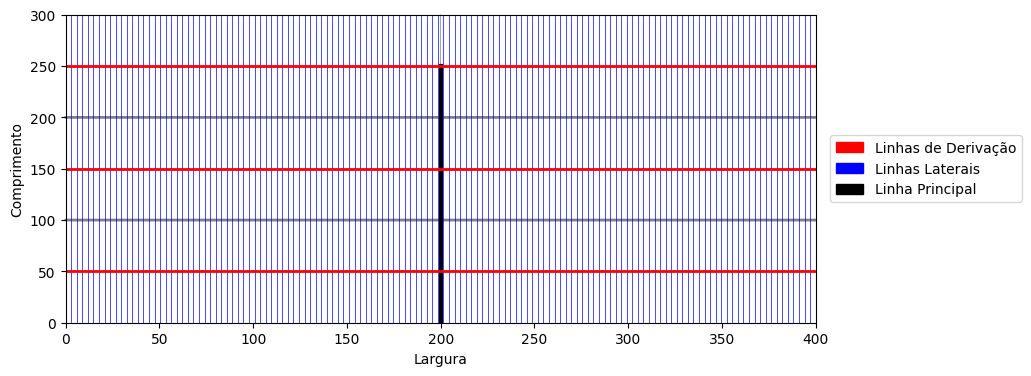

In [1508]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def criar_retangulo_dividido(x, y, numero, lLP, ns_par_abaixo):
    fig, ax = plt.subplots(figsize=(12, 4))

    # Desenhar o retângulo completo
    retangulo = patches.Rectangle((0, 0), x, y, linewidth=0.5, edgecolor='grey', facecolor='none')
    ax.add_patch(retangulo)

    # Dividir o retângulo verticalmente ao meio
    meio = x / 2
    linha_vertical = patches.ConnectionPatch((meio, 0), (meio, y), "data", linewidth=0.5, color='grey')
    ax.add_patch(linha_vertical)

    # Dividir cada lado em partes
    largura_parte = y / numero
    for i in range(1, numero):
        linha_horizontal1 = patches.ConnectionPatch((0, i * largura_parte), (meio, i * largura_parte), "data", linewidth=2, color='grey')
        ax.add_patch(linha_horizontal1)

        linha_horizontal2 = patches.ConnectionPatch((meio, i * largura_parte), (x, i * largura_parte), "data", linewidth=2, color='grey')
        ax.add_patch(linha_horizontal2)

    # Adicionar a linha principal
    plt.plot([meio, meio], [0, lLP], color='black', linestyle='-', linewidth=3)

    # Adicionar as linhas verticais
    x_positions = [x / (nLL + 1) * (i + 1) for i in range(nLL)]
    for x_pos in x_positions:
        plt.plot([x_pos, x_pos], [0, y], color='blue', linestyle='-', linewidth=0.5)

    # Adicionar as linhas horizontais
    subretangulo_y = y / ns_par_abaixo
    for i in range(ns_par_abaixo):
        y_pos = (i + 1) * subretangulo_y
        if i % 2 == 0:
            plt.plot([meio - x/2, meio + x/2], [y_pos, y_pos], color='red', linestyle='-', linewidth=2)

    plt.xlim(0, x)
    plt.ylim(0, y)

    plt.ylabel('Comprimento')  # Update y-axis label to 'Largura'
    plt.xlabel('Largura')  # Update x-axis label to 'Comprimento'

    # Criar as caixas de cores para a legenda
    red_patch = patches.Patch(color='red', label='Linhas de Derivação')
    blue_patch = patches.Patch(color='blue', label='Linhas Laterais')
    black_patch = patches.Patch(color='black', label='Linha Principal')

    # Adicionar a legenda
    plt.legend(handles=[red_patch, blue_patch, black_patch], loc='center left', bbox_to_anchor=(1.01, 0.5))

    plt.subplots_adjust(right=0.75)  # Ajuste de espaço para acomodar a legenda


    plt.grid(False)
    plt.show()

# Exemplo de uso
largura = largura_m
comprimento = comprimento_m
numero = int(ns_par_abaixo / 2)

criar_retangulo_dividido(largura, comprimento, numero, lLP, ns_par_abaixo)

### 7º Passo: Dimensionamento da linha lateral – diâmetro

In [1509]:
if ne < 28:

    import pandas as pd

    colunas1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    valores1 = [1, 0.639, 0.534, 0.485, 0.457, 0.438, 0.425, 0.416, 0.408, 0.398, 0.396, 0.393, 0.39, 0.387, 0.385, 0.382, 0.375, 0.373, 0.372, 0.37, 0.368, 0.368, 0.366, 0.366, 0.364, 0.364, 0.362, 0.362, 0.362, 0.362]

    data1 = [valores1]

    # Create the dataframe from a list of records
    f_tabelado = pd.DataFrame.from_records(data1, columns=colunas1)

    # Initialize the new variable with None
    fLL = None

    # Loop through the values in "colunas1" and compare with "ne"
    for coluna, valor in zip(colunas1, f_tabelado.iloc[0]):
        if coluna == ne:
            fLL = valor
            break 
elif 30 < ne <= 35: 
    fLL = 0.395
elif 35 < ne <= 40: 
    fLL = 0.357
elif 40 < ne <= 50: 
    fLL = 0.355
elif 50 < ne <= 100: 
    fLL = 0.35
elif 100 < ne <= 250: 
    fLL = 0.348
elif 250 < ne <= 500: 
    fLL = 0.345

print(fLL)


0.37


In [1510]:
dLL = ((7.85*(10**-4)*lLL*(qLL**1.75)*fLL)/(0.2*pressao_de_servico_mca))**(1/4.75)

print(f"Dll = [(7.85*10^-4 * Lll * Qll^1,75 * F) / ∆H𝑚áxLL] ^ 1/4.75 \n    = [(7.85*(10^-4)* {lLL:.0f} * ({qLL:.2e}^1.75) * {fLL}) / (0.2 * {pressao_de_servico_mca})] ^ (1/4.75)  \n    = {dLL:.4f} m")

Dll = [(7.85*10^-4 * Lll * Qll^1,75 * F) / ∆H𝑚áxLL] ^ 1/4.75 
    = [(7.85*(10^-4)* 50 * (1.11e-04^1.75) * 0.37) / (0.2 * 15)] ^ (1/4.75)  
    = 0.0114 m


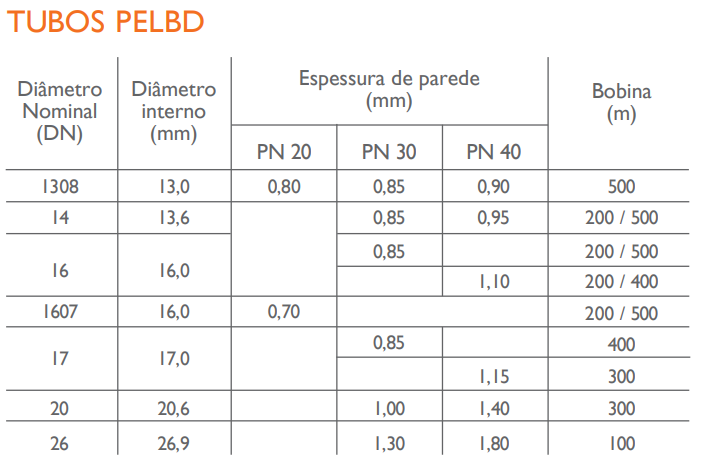

In [1511]:
if dLL < 0.017:
    novo_dLL = 0.017
    pn_do_novo_dll = 30
    print("O diamêtro da linha de derivação deve ser de de 17 mm.")
else:
    print("Mudar.")

O diamêtro da linha de derivação deve ser de de 17 mm.


### 8º Passo: Perda de carga na linha lateral

In [1512]:
deltaLL = ((7.85*(10**-4)*lLL*(qLL**1.75)*fLL)/(novo_dLL**4.75))

print(f"∆HLL = [(7.85*  10^-4 * Lll * Qll^1,75 * F) / Dll ^ 4,75] \n     = [(7.85 * (10^-4) * {lLL:.0f} * ({qLL:.2e}^1.75) * {fLL}) / ({novo_dLL:.2e} ^4.75)  \n     = {deltaLL:.2f} m")

∆HLL = [(7.85*  10^-4 * Lll * Qll^1,75 * F) / Dll ^ 4,75] 
     = [(7.85 * (10^-4) * 50 * (1.11e-04^1.75) * 0.37) / (1.70e-02 ^4.75)  
     = 0.44 m


### 9º Passo: Pressão no início da linha lateral (PLL)

In [1513]:
pLL = pressao_de_servico_mca+(0.75*deltaLL)+declividade_paralela_a_linha_lateral*lLL

# considerar a declividade.
# comparando com o PN
print(f"PLL = PS + (0,75 * ∆HLL) ± (desnível * Lll) \n    = {pressao_de_servico_mca} + (0.75 * {deltaLL:.2f}) + ({declividade_paralela_a_linha_lateral} * {lLL:.0f})  \n    = {pLL:.2f} mca")

PLL = PS + (0,75 * ∆HLL) ± (desnível * Lll) 
    = 15 + (0.75 * 0.44) + (0.03 * 50)  
    = 16.83 mca


### 10º Passo: Dimensionamento da linha de derivação – diâmetro

In [1514]:
if nLL < 28:

    import pandas as pd

    colunas1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    valores1 = [1, 0.639, 0.534, 0.485, 0.457, 0.438, 0.425, 0.416, 0.408, 0.398, 0.396, 0.393, 0.39, 0.387, 0.385, 0.382, 0.375, 0.373, 0.372, 0.37, 0.368, 0.368, 0.366, 0.366, 0.364, 0.364, 0.362, 0.362, 0.362, 0.362]

    data1 = [valores1]

    # Create the dataframe from a list of records
    f_tabelado = pd.DataFrame.from_records(data1, columns=colunas1)

    # Initialize the new variable with None
    fLD = None

    # Loop through the values in "colunas1" and compare with "ne"
    for coluna, valor in zip(colunas1, f_tabelado.iloc[0]):
        if coluna == nLL:
            fLD = valor
            break 
elif 30 < nLL <= 35: 
    fLD = 0.395
elif 35 < nLL <= 40: 
    fLD = 0.357
elif 40 < nLL <= 50: 
    fLD = 0.355
elif 50 < nLL <= 100: 
    fLD = 0.35
elif 100 < nLL <= 250: 
    fLD = 0.348
elif 250 < nLL <= 500: 
    fLD = 0.345

print(fLD)

0.348


In [1515]:
dLD = ((7.85*(10**-4)*lLD*(qLD**1.75)*fLD)/(0.1*pressao_de_servico_mca))**(1/4.75)

print(f"Dld = [(7.85*10^-4 * Lld * Qld^1,75 * F) / ∆H𝑚áxLD] ^ 1/4.75 \n    = [(7.85 * (10^-4) * {lLD:.0f} * ({qLD:.2e}^1.75) * {fLD}) / (0.1*{pressao_de_servico_mca})] ^ (1/4.75) \n    = {dLD:.4f} m")

Dld = [(7.85*10^-4 * Lld * Qld^1,75 * F) / ∆H𝑚áxLD] ^ 1/4.75 
    = [(7.85 * (10^-4) * 200 * (1.49e-02^1.75) * 0.348) / (0.1*15)] ^ (1/4.75) 
    = 0.1057 m


##### 10.1. Conferir qual o PN que suporta

In [1516]:
if dLD < 0.1:
    deltaLD = ((7.85*(10**-4)*lLD*(qLD**1.75)*fLD)/(dLD**4.75))
else:
    deltaLD = 10.64 * (lLD/(dLD**4.87)) * ((qLD/140)**1.852) * fLD



pLD = pLL + deltaLD + (declividade_nao_paralela_a_linha_lateral*lLD)

print(pLD)

24.670837432580203


In [1517]:
if pLD <= 60:
        colunas3 = [100, 150, 200, 250, 300, 350, 400, 500]
        valores3 = [112.6, 162.2, 212.2, 261.6, 311.2, 363, 412.2, 511]

        data3 = [valores3]

        # criar o dataframe a partir de uma lista de registros
        pn60 = pd.DataFrame.from_records(data3, columns=colunas3)
        print(pn60)

        dLD_para_comparacao = dLD*1000

        # inicializando a nova variável com None
        novo_dLD = None

        # percorrendo os valores em "valores1" e comparando com "dll"
        for valor in pn60.iloc[0]:
                if dLD_para_comparacao < valor:
                        novo_dLD = valor
                        break

        print("\nO diâmetro da linha de derivação deve ser de", novo_dLD, "mm com PN60") # valor encontrado

elif pLD <= 80:
        colunas2 = [50, 75, 100, 150, 200, 250, 300, 350, 400, 500]
        valores2 = [46.7, 70.5, 111.8, 161.2, 210.4, 259.8, 309, 358.2, 406.6, 504.2]

        data2 = [valores2]

        # criar o dataframe a partir de uma lista de registros
        pn80 = pd.DataFrame.from_records(data2, columns=colunas2)
        print(pn80)

        dLD_para_comparacao = dLD*1000

        # inicializando a nova variável com None
        novo_dLD = None

        # percorrendo os valores em "valores1" e comparando com "dll"
        for valor in pn80.iloc[0]:
                if dLD_para_comparacao < valor:
                        novo_dLD = valor
                        break

        print("\nO diâmetro da linha de derivação deve ser de", novo_dLD, "mm com PN80") # valor encontrado        
else:
    colunas1 = [100, 150, 200, 250, 300, 350, 400, 500]
    valores1 = [108.4, 156.4, 204.2, 252, 299.8, 347.6, 394.6, 489.4]

    data1 = [valores1]

    # criar o dataframe a partir de uma lista de registros
    pn125 = pd.DataFrame.from_records(data1, columns=colunas1)
    print(pn125)

    dLD_para_comparacao = dLD*1000

    # inicializando a nova variável com None
    novo_dLD = None

    # percorrendo os valores em "valores1" e comparando com "dll"
    for valor in pn125.iloc[0]:
        if dLD_para_comparacao < valor:
            novo_dLD = valor
            break

    # se "novo_dll" ainda for None, significa que "dll" é maior que todos os valores em "valores1"
    if novo_dLD is None:
        novo_dLD = pn125.iloc[0][-1]

    print("\nO diâmetro da linha de derivação deve ser de", novo_dLD, "mm com PN125") # valor encontrado

     100    150    200    250    300  350    400  500
0  112.6  162.2  212.2  261.6  311.2  363  412.2  511

O diâmetro da linha de derivação deve ser de 112.6 mm com PN60


### 11º Passo: Perda de carga na linha de derivação

In [1518]:
novo_dLD = novo_dLD/1000

if novo_dLD < 0.1:
    deltaLD = ((7.85*(10**-4)*lLD*(qLD**1.75)*fLD)/(novo_dLD**4.75))**(1/4.87)
    print (f"∆HLD = [(7.85*  10^-4 * Lld * Qld^1,75 * F) / Dld ^ 4,75] \n     = [(7.85*  10^-4 * {lLD:.0f} * {qLD:.2e}^1,75 * F) / {novo_dLD:.2f} ^ 4,75] \n     = {deltaLD:.2f} m")
else:
    deltaLD = 10.64 * (lLD/(novo_dLD**4.87)) * ((qLD/140)**1.852) * fLD
    print (f"∆HLD = 10,64 * [Lld / (Dld^4,87)] * [(Qld/C)^1,852] * F \n     = 10,64 * [{lLD:.0f} / ({novo_dLD:.2e}^4,87)] * [({qLD:.2e} / 140)^1,852] * {fLD} \n     = {deltaLD:.2f} m")

∆HLD = 10,64 * [Lld / (Dld^4,87)] * [(Qld/C)^1,852] * F 
     = 10,64 * [200 / (1.13e-01^4,87)] * [(1.49e-02 / 140)^1,852] * 0.348 
     = 1.35 m


### 12º Passo: Pressão no início da linha de derivação (Pld)

In [1519]:
pLD = pLL + deltaLD + (declividade_nao_paralela_a_linha_lateral*lLD)

print(f"Pld = Pll + ∆𝐻𝐿𝐷 ± 𝑑𝑒𝑠𝑛í𝑣𝑒𝑙 ∙ Lld \n    = {pLL:.2f} + {deltaLD:.2f} ± ({declividade_nao_paralela_a_linha_lateral}*{lLD:.0f}) \n    = {pLD:.2f} mca")

Pld = Pll + ∆𝐻𝐿𝐷 ± 𝑑𝑒𝑠𝑛í𝑣𝑒𝑙 ∙ Lld 
    = 16.83 + 1.35 ± (0.03*200) 
    = 24.18 mca


### 13º Passo: Dimensionamento da linha principal – diâmetro

In [1520]:
dLP = math.sqrt((4*qLP)/(math.pi*2))

print(f"Dlp = sqrt[(4 * Qlp) / π * v] \n    = sqrt[(4 * {qLP:.2e}) / π * 2] \n    = {dLP:.4f} m")

Dlp = sqrt[(4 * Qlp) / π * v] 
    = sqrt[(4 * 1.49e-02) / π * 2] 
    = 0.0974 m


In [1521]:
if pLD <= 60:
        colunas3 = [100, 150, 200, 250, 300, 350, 400, 500]
        valores3 = [112.6, 162.2, 212.2, 261.6, 311.2, 363, 412.2, 511]

        data3 = [valores3]

        # criar o dataframe a partir de uma lista de registros
        pn60 = pd.DataFrame.from_records(data3, columns=colunas3)
        print(pn60)

        dLP_para_comparacao = dLP*1000

        # inicializando a nova variável com None
        novo_dLP = None

        # percorrendo os valores em "valores1" e comparando com "dll"
        for valor in pn60.iloc[0]:
                if dLP_para_comparacao < valor:
                        novo_dLP = valor
                        break

        print("\nO diâmetro da linha principal deve ser de", novo_dLP, "mm com PN60") # valor encontrado

elif pLD <= 80:
        colunas2 = [50, 75, 100, 150, 200, 250, 300, 350, 400, 500]
        valores2 = [46.7, 70.5, 111.8, 161.2, 210.4, 259.8, 309, 358.2, 406.6, 504.2]

        data2 = [valores2]

        # criar o dataframe a partir de uma lista de registros
        pn80 = pd.DataFrame.from_records(data2, columns=colunas2)
        print(pn80)

        dLP_para_comparacao = dLP*1000

        # inicializando a nova variável com None
        novo_dLP = None

        # percorrendo os valores em "valores1" e comparando com "dll"
        for valor in pn80.iloc[0]:
                if dLP_para_comparacao < valor:
                        novo_dLP = valor
                        break

        print("\nO diâmetro da linha principal deve ser de", novo_dLP, "mm com PN80") # valor encontrado        
else:
    colunas1 = [100, 150, 200, 250, 300, 350, 400, 500]
    valores1 = [108.4, 156.4, 204.2, 252, 299.8, 347.6, 394.6, 489.4]

    data1 = [valores1]

    # criar o dataframe a partir de uma lista de registros
    pn125 = pd.DataFrame.from_records(data1, columns=colunas1)
    print(pn125)

    dLP_para_comparacao = dLP*1000

    # inicializando a nova variável com None
    novo_dLP = None

    # percorrendo os valores em "valores1" e comparando com "dll"
    for valor in pn125.iloc[0]:
        if dLP_para_comparacao < valor:
            novo_dLP = valor
            break

    print("\nO diâmetro da linha principal deve ser de", novo_dLP, "mm com PN125") # valor encontrado

     100    150    200    250    300  350    400  500
0  112.6  162.2  212.2  261.6  311.2  363  412.2  511

O diâmetro da linha principal deve ser de 112.6 mm com PN60


### 14º Passo: Perda de carga na linha principal

In [1522]:
fLP = 1 #Referente ao número de setores que vão ser acionados de uma vez.

In [1523]:
novo_dLP = novo_dLP/1000

if novo_dLP < 0.1:
    deltaLP = ((7.85*(10**-4)*lLP*(qLP**1.75)*fLP)/(novo_dLP**4.75))
    print (f"∆HLP = [(7.85*  10^-4 * Llp * Qlp^1,75 * F) / Dlp ^ 4,75] \n     = [(7.85*  10^-4 * {lLP:.0f} * {qLP:.2e}^1,75 * F) / {novo_dLP:.2f} ^ 4,75] \n     = {deltaLP:.2f} m")

else:
    deltaLP = 10.64 * (lLP/(novo_dLP**4.87)) * ((qLP/140)**1.852) * fLP
    print (f"∆HLP = 10,64 * [Llp / (Dlp^4,87)] * [(Qlp/C)^1,852] * F \n     = 10,64 * [{lLP:.0f} / ({novo_dLP:.2e}^4,87)] * [({qLP:.2e} / 140)^1,852] * {fLP} \n     = {deltaLP:.2f} m")

∆HLP = 10,64 * [Llp / (Dlp^4,87)] * [(Qlp/C)^1,852] * F 
     = 10,64 * [250 / (1.13e-01^4,87)] * [(1.49e-02 / 140)^1,852] * 1 
     = 4.85 m


### 15º Passo: Dimensionamento da adutora – diâmetro

In [1524]:
dAD = math.sqrt((4*qAD)/(math.pi*2))

print(f"Dad = sqrt[(4 * Qad) / π * v] \n    = sqrt[(4 * {qAD:.2e}) / π * 2] \n    = {dAD:.4f} m")

Dad = sqrt[(4 * Qad) / π * v] 
    = sqrt[(4 * 1.49e-02) / π * 2] 
    = 0.0974 m


In [1525]:
import pandas as pd

if pLD <= 60:
    colunas3 = [100, 150, 200, 250, 300, 350, 400, 500]
    valores3 = [112.6, 162.2, 212.2, 261.6, 311.2, 363, 412.2, 511]

    data3 = [valores3]

    # criar o dataframe a partir de uma lista de registros
    pn60 = pd.DataFrame.from_records(data3, columns=colunas3)
    print(pn60)

    dAD_para_comparacao = dAD * 1000

    # inicializando as novas variáveis com None
    novo_dAD = None
    novo_dAD_nominal = None

    # percorrendo os valores em "valores3" e comparando com "dAD_para_comparacao"
    for coluna, valor in pn60.items():
        if dAD_para_comparacao < valor.values[0]:
            novo_dAD = valor.values[0]
            novo_dAD_nominal = coluna
            break

    print("\nO diâmetro da adutora deve ser de", novo_dAD, "mm com PN60")  # valor encontrado

elif pLD <= 80:
    colunas2 = [50, 75, 100, 150, 200, 250, 300, 350, 400, 500]
    valores2 = [46.7, 70.5, 111.8, 161.2, 210.4, 259.8, 309, 358.2, 406.6, 504.2]

    data2 = [valores2]

    # criar o dataframe a partir de uma lista de registros
    pn80 = pd.DataFrame.from_records(data2, columns=colunas2)
    print(pn80)

    dAD_para_comparacao = dAD * 1000

    # inicializando as novas variáveis com None
    novo_dAD = None
    novo_dAD_nominal = None

    # percorrendo os valores em "valores2" e comparando com "dAD_para_comparacao"
    for coluna, valor in pn80.items():
        if dAD_para_comparacao < valor.values[0]:
            novo_dAD = valor.values[0]
            novo_dAD_nominal = coluna
            break

    print("\nO diâmetro da adutora deve ser de", novo_dAD, "mm com PN80")  # valor encontrado

else:
    colunas1 = [100, 150, 200, 250, 300, 350, 400, 500]
    valores1 = [108.4, 156.4, 204.2, 252, 299.8, 347.6, 394.6, 489.4]

    data1 = [valores1]

    # criar o dataframe a partir de uma lista de registros
    pn125 = pd.DataFrame.from_records(data1, columns=colunas1)
    print(pn125)

    dAD_para_comparacao = dAD * 1000

    # inicializando as novas variáveis com None
    novo_dAD = None
    novo_dAD_nominal = None

    # percorrendo os valores em "valores1" e comparando com "dAD_para_comparacao"
    for coluna, valor in pn125.items():
        if dAD_para_comparacao < valor.values[0]:
            novo_dAD = valor.values[0]
            novo_dAD_nominal = coluna
            break

    print("\nO diâmetro da adutora deve ser de", novo_dAD, "mm com PN125")  # valor encontrado


     100    150    200    250    300  350    400  500
0  112.6  162.2  212.2  261.6  311.2  363  412.2  511

O diâmetro da adutora deve ser de 112.6 mm com PN60


### 16º Passo: Perda de carga na adutora

In [1526]:
novo_dAD = novo_dAD/1000

deltaAD = 10.64 * (lAD/(novo_dAD**4.87)) * ((qAD/140)**1.852) 

print(f"∆HAD = 10,64 * [Lad / (Dad^4,87)] * [(Qad/C)^1,852] * F \n     = 10,64 * [{lAD:.0f} / ({novo_dAD:.2e}^4,87)] * [({qAD:.2e} / 140)^1,852] \n     = {deltaAD:.2f} m")

∆HAD = 10,64 * [Lad / (Dad^4,87)] * [(Qad/C)^1,852] * F 
     = 10,64 * [132 / (1.13e-01^4,87)] * [(1.49e-02 / 140)^1,852] 
     = 2.56 m


### 17º Passo: Dimensionamento da sucção – diâmetro

In [1527]:
colunas4 = [50, 75, 100, 125, 150, 175, 200, 250, 300, 350]
valores4 = [46.8, 72.2, 97.6, 123, 148.4, 173.8, 199.2, 250, 300.8, 351.6]

aco_zincado = pd.DataFrame([valores4], columns=colunas4)
print(aco_zincado)

novo_dSU = None
novo_dSU_nominal = None

for valor in aco_zincado.iloc[0]:
    if valor > novo_dAD_nominal:
        novo_dSU = valor
        novo_dSU_nominal = aco_zincado.columns[aco_zincado.iloc[0].tolist().index(valor)]
        break

print("\nO diâmetro interno da sucção deve ser de:", novo_dSU, "mm, \njá o diâmetro nominal, portanto de: ", novo_dSU_nominal, "mm com aco_zincado.")  # próximo maior valor encontrado

    50    75    100  125    150    175    200  250    300    350
0  46.8  72.2  97.6  123  148.4  173.8  199.2  250  300.8  351.6

O diâmetro interno da sucção deve ser de: 123.0 mm, 
já o diâmetro nominal, portanto de:  125 mm com aco_zincado.


### 18º Passo: Perda de carga na sucção

In [1528]:
novo_dSU = novo_dSU/1000

deltaS = 10.64 * (10/(novo_dSU**4.87)) * ((qAD/125)**1.852) 

print(f"∆HS = 10,64 * [Ls / (Ds^4,87)] * [(Qs/C)^1,852] * F \n     = 10,64 * [10 / ({novo_dSU:.2e}^4,87)] * [({qAD:.2e} / 140)^1,852] \n     = {deltaS:.2f} m")

∆HS = 10,64 * [Ls / (Ds^4,87)] * [(Qs/C)^1,852] * F 
     = 10,64 * [10 / (1.23e-01^4,87)] * [(1.49e-02 / 140)^1,852] 
     = 0.16 m


### 19º Passo: Perda de carga

##### 19.1. ΔH

In [1529]:
deltaH = deltaLL+deltaLD+deltaLP+deltaAD+deltaS

print(f"∆𝐻 = ∆𝐻𝐿𝐿 + ∆𝐻𝐿𝐷 + ∆𝐻𝐿𝑃 + ∆𝐻𝑎𝑑 + ∆Hs \n   = {deltaLL:.2f} + {deltaLD:.2f} + {deltaLP:.2f} + {deltaAD:.2f} + {deltaS:.2f} \n   = {deltaH:.2f} m")

∆𝐻 = ∆𝐻𝐿𝐿 + ∆𝐻𝐿𝐷 + ∆𝐻𝐿𝑃 + ∆𝐻𝑎𝑑 + ∆Hs 
   = 0.44 + 1.35 + 4.85 + 2.56 + 0.16 
   = 9.35 m


##### 19.2. Perda de carga localizada (Δhloc)

In [1530]:
deltaHloc = 0.1 * deltaH

print(f"∆hloc = 10% ∆𝐻 \n      = 0.1 * {deltaH:2f} \n      = {deltaHloc:.2f} m")

∆hloc = 10% ∆𝐻 
      = 0.1 * 9.353796 
      = 0.94 m


### 20º Passo: Escolha do sistema de filtragem

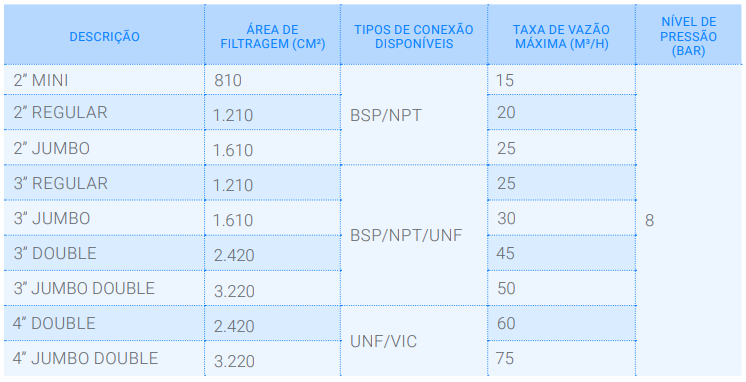

In [1616]:
qFILTRO = 1.1 * qAD * 3600


colunas5 = ['2” MINI', '2” REGULAR', '2” JUMBO', '3” REGULAR', '3” JUMBO', '3” DOUBLE', '3” JUMBO DOUBLE', '4” JUMBO', '4” JUMBO DOUBLE']
valores5 = [15,20,25,25,30,45,50,60,75]

filtros = pd.DataFrame([valores5], columns=colunas5)

taxa_maxima_de_vazao = None
nome_do_filtro = None

for valor in filtros.iloc[0]:
    if valor > qFILTRO:
        taxa_maxima_de_vazao = valor
        nome_do_filtro = filtros.columns[filtros.iloc[0].tolist().index(valor)]
        break

print(f"Qfiltro = 1,1 * Qad * 3600 \n        = 1.1 * {qAD:.2e} * 3600 \n        = {qFILTRO:.2f} m³/h  \n        = Portanto o filtro deve ser o {nome_do_filtro} com taxa máxima de vazão de {taxa_maxima_de_vazao} m³/h.")

Qfiltro = 1,1 * Qad * 3600 
        = 1.1 * 1.49e-02 * 3600 
        = 58.96 m³/h  
        = Portanto o filtro deve ser o 4” JUMBO com taxa máxima de vazão de 60 m³/h.


#### 20.1. Perda de carga do filtro

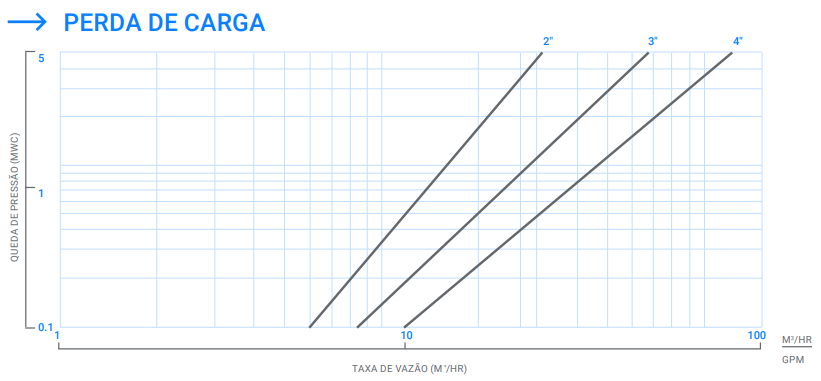

In [1620]:
catalogo = 4.5
deltaHfiltro = catalogo+3 

print(f"∆Hfiltro = catalogo + sujeira (3) \n         = {catalogo} + 3  \n         = {deltaHfiltro} mca")

∆Hfiltro = catalogo + sujeira (3) 
         = 4.5 + 3  
         = 7.5 mca


### 21º Passo: Altura manométrica da bomba (Hm)


In [1622]:
hM = pLD+deltaLP+(declividade_nao_paralela_a_linha_lateral* lLP) + deltaAD + deltaS + 4 + deltaHloc + deltaHfiltro

print(f"𝐻𝑚 = 𝑃𝐿𝐷 + ∆𝐻𝐿𝑃 ± 𝐷𝑒𝑠𝑛í𝑣𝑒𝑙𝐿𝑃 ∙ 𝐿𝐿𝑃 + ∆𝐻𝑎𝑑 ± 𝐷𝑒𝑠𝑛í𝑣𝑒𝑙𝑎𝑑 ∙ 𝐿𝑎𝑑 + ∆𝐻 + ℎs + + ∆ℎ𝑙𝑜𝑐 + ∆ℎ𝑓𝑖𝑙𝑡𝑟o \n    = {pLD:.2f} + {deltaLP:.2f} ± ({declividade_nao_paralela_a_linha_lateral:.2f} * {lLP:.2f}) + {deltaAD:.2f} ± (0 * {lAD:.2f}) + {deltaS:.2f} + 4 + {deltaHloc:.2f} + {deltaHfiltro}   \n    = {hM:.2f} m")

𝐻𝑚 = 𝑃𝐿𝐷 + ∆𝐻𝐿𝑃 ± 𝐷𝑒𝑠𝑛í𝑣𝑒𝑙𝐿𝑃 ∙ 𝐿𝐿𝑃 + ∆𝐻𝑎𝑑 ± 𝐷𝑒𝑠𝑛í𝑣𝑒𝑙𝑎𝑑 ∙ 𝐿𝑎𝑑 + ∆𝐻 + ℎs + + ∆ℎ𝑙𝑜𝑐 + ∆ℎ𝑓𝑖𝑙𝑡𝑟o 
    = 24.18 + 4.85 ± (0.03 * 250.00) + 2.56 ± (0 * 132.00) + 0.16 + 4 + 0.94 + 7.5   
    = 51.68 m


### 22º Passo: Escolha da bomba

##### 22.1. Hv: tensão de vapor do líquido (mca)

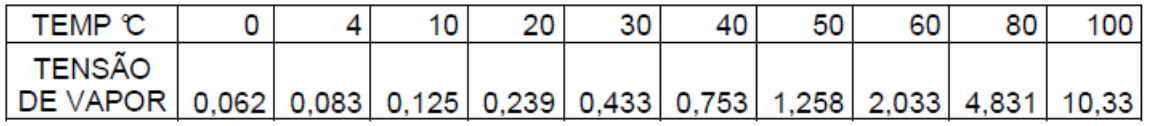

In [1623]:
hV = 0.239

##### 22.2. Ho: pressão atmosférica local (mca)

In [1624]:
h0 = 10.33 - (altitude_m/700)

print(f"H0 = 10,33 - [altitude do local (m)/700] \n   = 10,33 - [{altitude_m:.0f}/700] \n   = {h0:.2f} m")

H0 = 10,33 - [altitude do local (m)/700] 
   = 10,33 - [1161/700] 
   = 8.67 m


##### 22.3. NPSHd

In [1625]:
nPSHd = h0 - hV - 4 - deltaS

print(f"𝑁𝑃𝑆𝐻𝐷 = 𝐻𝑜 − 𝐻𝑉 − ℎ𝑠 − ∆𝐻s \n       = {h0:.2f} - {hV:.2f} - 4 - {deltaS:.2f}  \n       = {nPSHd:.2f} m")

𝑁𝑃𝑆𝐻𝐷 = 𝐻𝑜 − 𝐻𝑉 − ℎ𝑠 − ∆𝐻s 
       = 8.67 - 0.24 - 4 - 0.16  
       = 4.28 m


##### 22.4. VALORES PARA O PROGRAMA DE CATÁLOGO DE BOMBAS:

In [1626]:
print(f"NPSHd= {nPSHd:.3f} m \nQ = {qAD*3600:.3f} m³/s \nHm = {hM:.3f} mca")

NPSHd= 4.277 m 
Q = 53.600 m³/s 
Hm = 51.678 mca


### 23º Passo: Potência da bomba

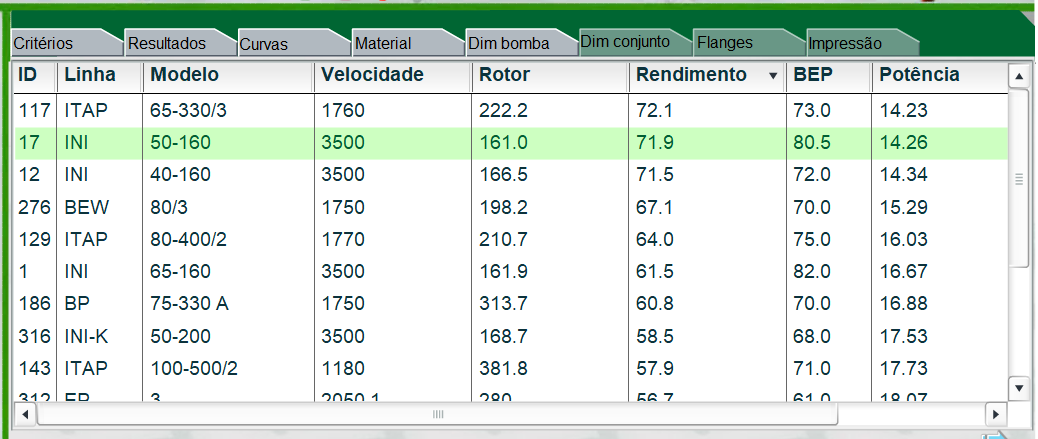

In [1629]:
rendimento_da_bomba = 0.719

p = (qAD*hM*1000)/(75*rendimento_da_bomba)

print(f"P = (𝑄 ∙ 𝐻𝑚 ∙ 1000)/(75 ∙ 𝜂𝑏𝑜𝑚𝑏a) \n  = ({qAD:.2e} * {hM:.2f} * 1000) / (75 * {rendimento_da_bomba})  \n  = {p:.2f} cv")

P = (𝑄 ∙ 𝐻𝑚 ∙ 1000)/(75 ∙ 𝜂𝑏𝑜𝑚𝑏a) 
  = (1.49e-02 * 51.68 * 1000) / (75 * 0.719)  
  = 14.27 cv


### 24º Passo: Potência do motor

In [1630]:
if p < 2:
    pMOTOR = p*1,5
    print(f"Pmotor = 1.5 * p \n       = 1.5 * {p:.2f}  \n       = {pMOTOR:.2f} cv")
elif 2 < p <= 5:
    pMOTOR = p*1.3
    print(f"Pmotor = 1.3 * p \n       = 1.3 * {p:.2f}  \n       = {pMOTOR:.2f} cv")
elif 5 < p <= 10:
    pMOTOR = p*1.2
    print(f"Pmotor = 1.2 * p \n       = 1.2 * {p:.2f}  \n       = {pMOTOR:.2f} cv")
elif 20 < p <= 20:
    pMOTOR = p*1.15
    print(f"Pmotor = 1.15 * p \n       = 1.15 * {p:.2f}  \n       = {pMOTOR:.2f} cv")
else:
    pMOTOR = p*1.1
    print(f"Pmotor = 1.1 * p \n       = 1.1 * {p:.2f}  \n       = {pMOTOR:.2f} cv")

Pmotor = 1.1 * p 
       = 1.1 * 14.27  
       = 15.70 cv
